### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2201]:
data = pd.read_csv('data/coupons.csv')

In [2202]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [2204]:
#  Look at the table level to identify which columns have null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Steps to further investigate the dataset for missing or problematic data.
### **1 - Look at the table level to indentify which coloumns have null values.**
#### ````data.info()````

  #### - Results show that the following coloumns have null values: Car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 

### **2 - Look at data values that are reported NULL for a given coloumn for e.g. Car and repeat following for all the coloumns that has null values from the step 1**


#### ````carNullValues = pd.isnull(data['car'])````
####  ````missingData = data[carNullValues]````
####  ````print(missingData['car']````

### The following table captures the count of null values and value of null column resulted from running the above command for all the columns that has null values from the step 1
|Col Name              |Total null   |Value of null col reported
|----------------------|-------------|--------------------------
|Car                   |12576 null   |NaN
|Bar                   |107   null   |NaN
|CoffeeHose            |217   null   |NaN
|CarryAway             |151   null   |NaN
|RestaurantLessThan20  |130   null   |NaN
|Restaurant20To50      |189   null   |NaN


### **3 - Look at the unique values for a given column for e.g. Car repeat following for all the columns that has null values from the step 1**

#### ````unique_cars = data['car'].unique()````
#### ````print(unique_cars)````

### The following table captures the unique values resulted from running the above command for all the columns that has null values from the step 1
|Col Name              |Unique Values
|----------------------|-------------------------------------------------------------------------
|Car                   |nan, Scooter and motorcycle, crossover, Mazda5, do not drive,Car that is too old to install Onstar :D                      | 
|Bar                   |never, less1, 1\~3, gt8, nan, 4\~8|
|CoffeeHose            |never, less1, 4\~8, 1\~3, gt8, nan|
|CarryAway             |nan, 4\~8, 1\~3, gt8, less1, never|
|RestaurantLessThan20  |4\~8, 1\~3, less1, gt8, nan, never|
|Restaurant20To50      |1\~3, less1, never, gt8, 4\~8, nan|

### **4 - Look at the mode value for a given coloumn for e.g. Car repeat following for all the columns that has null values from the step 1**
#### ````mode = data['car'].mode().max()````
#### ````print(mode)````
### The following table captures the Mode values resulted from running the above command for all the columns that has null values from the step 1
|Col Name              |Mode value
|----------------------|------------
|Car                   |do not drive
|Bar                   |never
|CoffeeHose            |less1
|CarryAway             |1~3
|RestaurantLessThan20  |1~3
|Restaurant20To50      |less1


3. Decide what to do about your missing data -- drop, replace, other...

In [2207]:
#  Drop the Car column as most of the values are missing and the value of this column has no direct impact for the data analysis problem at hand.

data = data.drop('car',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [2208]:
#  Replace following columns with respective Mode value
#  Bar - Replace with with Mode value -> never   
modeBar = data['Bar'].mode().max()
data['Bar'] = data['Bar'].fillna(modeBar)

#  CoffeeHose - Replace with with Mode value -> less1  
modeCoffeeHouse = data['CoffeeHouse'].mode().max()
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(modeCoffeeHouse)

#  CarryAway - Replace with with Mode value -> 1~3    
modeCarryAway = data['CarryAway'].mode().max()
data['CarryAway'] = data['CarryAway'].fillna(modeCarryAway)

#  RestaurantLessThan20 - Replace with with Mode value -> 1~3
modeRestaurantLessThan20 = data['RestaurantLessThan20'].mode().max()
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(modeRestaurantLessThan20)

#  Restaurant20To50 - Replace with with Mode value -> less1
modeRestaurant20To50 = data['Restaurant20To50'].mode().max()
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(modeRestaurant20To50)

#  look at the cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon?



The proportion of the total observations choose to accept the coupon is : 0.5684326710816777


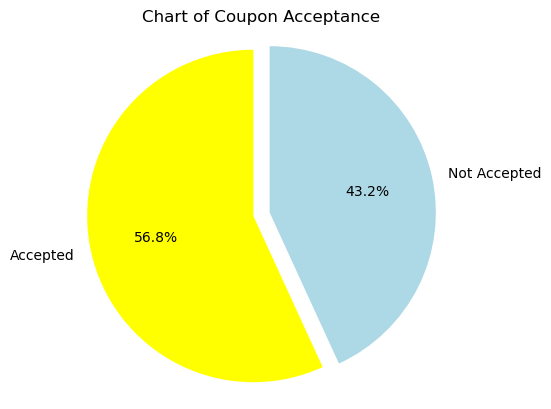

In [2210]:
#  Calculating proportion of coupon acceptance
couponAcceptedProportion = (data['Y'] == 1).mean()
print('The proportion of the total observations choose to accept the coupon is : ' + str(couponAcceptedProportion))

#  Plot a pie chart to visualize coupon accepted vs not accepted audience
counts = data['Y'].value_counts()
labels = ['Accepted','Not Accepted']
colors = ['yellow','lightblue']
plt.pie(counts, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = [0.1,0])
plt.title('Chart of Coupon Acceptance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [2212]:
#  Visualize the coupon column using plotly

#  import plotly.express
import plotly.express as px

#  Set different plot attributes
fig = px.bar(data.coupon.value_counts(), title = 'Value count of Coupon categories', color = ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away','Bar','Restaurant(20-50)'], labels = {'color':'Coupon Type'})
fig.update_layout(xaxis_title='Coupon type',width=1000,height=600)
fig.update_traces(marker=dict(line=dict(color='black',width=1)))

#  Display bar plot with the attibutes set above.
fig.show()

6. Use a histogram to visualize the temperature column.

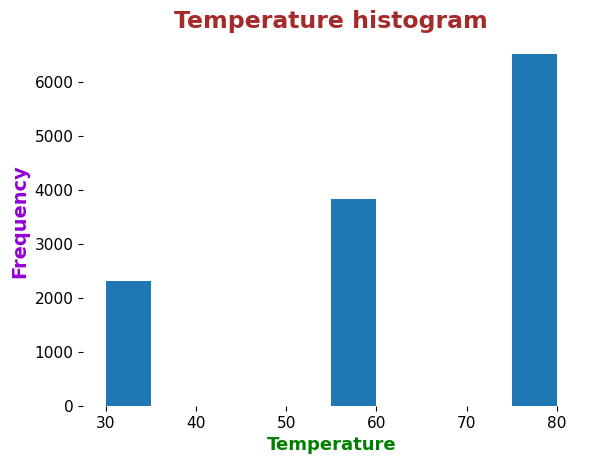

In [2214]:
#  Call hist function on plt
plt.hist(data['temperature'])

#  Set histogram plot attributes
plt.title('Temperature histogram',fontsize=17,fontweight='bold',color='Brown')
plt.xlabel('Temperature',fontsize=13,fontweight='bold',color='Green')
plt.ylabel('Frequency',fontsize=14,fontweight='bold',color='darkviolet')
plt.box(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

#  Display the histogram to visualize the temperature column.
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [2216]:
#  Create DataFrame barData that only contains Bar coupons
barData = data[data['coupon']=='Bar']
barData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

2. What proportion of bar coupons were accepted?


The proportion of bar coupons accepted is: 0.41001487357461575


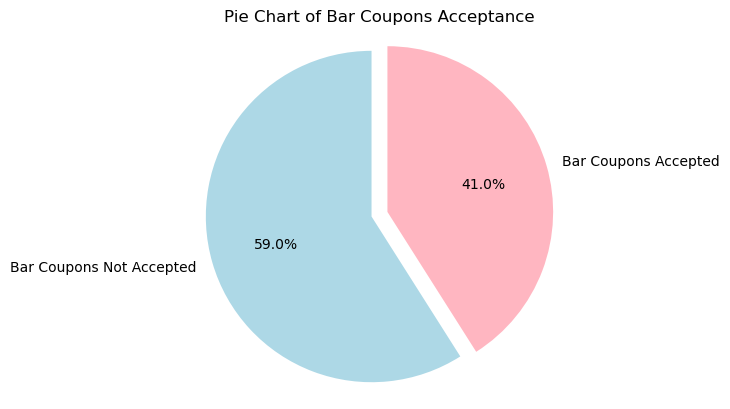

In [2218]:
#  Calculate the bar coupons accepted proportion
barCouponAccepatedProportion = (barData['Y'] == 1).mean()
print('The proportion of bar coupons accepted is: ' + str(barCouponAccepatedProportion))

#  Plot a pie chart to visualize coupon accepted vs not accepted audience
barDataCounts = barData['Y'].value_counts()
barDataCountsLabels = ['Bar Coupons Not Accepted','Bar Coupons Accepted']
barDataCountsColors = ['lightblue','lightpink']
plt.pie(barDataCounts, labels = barDataCountsLabels, colors = barDataCountsColors, autopct = '%1.1f%%', startangle = 90, explode = [0,0.1])
plt.title('Pie Chart of Bar Coupons Acceptance')
plt.axis('equal')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [2220]:
#  Acceptance rate for those who went to bar 3 or fewer times a month.  
#  To calculate that include the Bar vaues - never, less1, and  1~3
barDataLess_than_or_equal_3 = barData[(barData['Bar']=='never') | (barData['Bar']=='less1') | (barData['Bar']=='1~3')]
accepted_barDataLess_than_or_equal_3 = barDataLess_than_or_equal_3[barDataLess_than_or_equal_3['Y']==1]
barDataLess_valueCounts = accepted_barDataLess_than_or_equal_3['Y'].value_counts()
barDataLessAcceptanceRate = (barDataLess_valueCounts/len(barDataLess_than_or_equal_3)) * 100
print('Acceptance rate for those who went to bar 3 or fewer times a month: ')
print(barDataLessAcceptanceRate, end = '\n\n')

#  Acceptance rate for those who went to bar more than 3 times a month.
#  To calculate that include the Bar values - 4~8 and gt8
barData_greater_than_3 = barData[(barData['Bar']=='4~8') | (barData['Bar']=='gt8')]
accepted_barData_greater_than_3 = barData_greater_than_3[barData_greater_than_3['Y']==1]
valueCounts_barData_greater_than_3 = accepted_barData_greater_than_3['Y'].value_counts()
barData_greater_than_3_AcceptanceRate = (valueCounts_barData_greater_than_3/len(barData_greater_than_3)) * 100

print('Acceptance rate for those who went to bar more than 3 times a month: ')
print(barData_greater_than_3_AcceptanceRate, end='\n\n')
print('The acceptance rate for those who went to bar more than 3 times a month is more than twice when compared to those who went less.')

Acceptance rate for those who went to bar 3 or fewer times a month: 
Y
1    37.073707
Name: count, dtype: float64

Acceptance rate for those who went to bar more than 3 times a month: 
Y
1    76.884422
Name: count, dtype: float64

The acceptance rate for those who went to bar more than 3 times a month is more than twice when compared to those who went less.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [2222]:
#  Acceptance rate for drivers who went to bar more than once a month and are over the age of 25
#  To calculate that include the Bar values - 1~3, 4~8, and gt8 AND age values greater than 25
barData_more_than_once_age_greater_than_25 = barData[((barData['Bar']=='1~3') | (barData['Bar']=='4~8') | (barData['Bar']=='gt8')) & (barData['age'].isin(['46', '26', '31', '41', '50plus', '36']))]
accepted_barData_more_than_once_age_greater_than_25 = barData_more_than_once_age_greater_than_25[barData_more_than_once_age_greater_than_25['Y']==1]
valueCounts_barData_more_than_once_age_greater_than_25 = accepted_barData_more_than_once_age_greater_than_25['Y'].value_counts()
AcceptanceRate_barData_more_than_once_age_greater_than_25 = (valueCounts_barData_more_than_once_age_greater_than_25/len(barData_more_than_once_age_greater_than_25)) * 100
print('Acceptance rate for drivers who went to bar more than once a month and are over the age of 25: ')
print(AcceptanceRate4_1, end = '\n\n')

#  Acceptance rate for all other drivers that are not covered in the above condition
barData_less_than_once_age_lessThan_or_equalTo_25 = barData[(((barData['Bar']=='never') | (barData['Bar']=='less1')) & (barData['age'].isin(['46', '26', '31', '41', '50plus', '36']))) | (((barData['Bar']=='1~3') | (barData['Bar']=='4~8') | (barData['Bar']=='gt8') | (barData['Bar']=='never') | (barData['Bar']=='less1')) & (barData['age'].isin(['21', 'below21'])) ) ]
subsetY_barData_less_than_once_age_lessThan_or_equalTo_25 = barData_less_than_once_age_lessThan_or_equalTo_25[barData_less_than_once_age_lessThan_or_equalTo_25['Y']==1]
valueCounts_barData_less_than_once_age_lessThan_or_equalTo_25 = subsetY_barData_less_than_once_age_lessThan_or_equalTo_25['Y'].value_counts()
AcceptanceRate4_2 = (valueCounts_barData_less_than_once_age_lessThan_or_equalTo_25/len(barData_less_than_once_age_lessThan_or_equalTo_25)) * 100
print('Acceptance rate for all other drivers that are not covered in the first condition: ')
print(AcceptanceRate4_2,end='\n\n')

print('Acceptance rate for drivers who went to bar more than once a month and are over the age of 25 is more than twice compared to all others.')


Acceptance rate for drivers who went to bar more than once a month and are over the age of 25: 
Y
1    69.52381
Name: count, dtype: float64

Acceptance rate for all other drivers that are not covered in the first condition: 
Y
1    33.500313
Name: count, dtype: float64

Acceptance rate for drivers who went to bar more than once a month and are over the age of 25 is more than twice compared to all others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [2224]:
#  Calculate acceptance rate for the..  
#  1 drivers who go to bars more than once a month AND
#  2 drivers who had passengers that were not a kid AND
#  3 drivers who had occupations other than farming, fishing, or forestry.

#  all accepted and not accepted data satisfying all 3 conditions mentioned for this question
barData_all_with_above_3_conditions = barData[((barData['Bar']=='1~3') | (barData['Bar']=='4~8') | (barData['Bar']=='gt8')) & (barData['passanger'] != 'Kid(s)') & (barData['occupation'] != 'Farming Fishing & Forestry')]

#  ONLY accepted data satisfying all 3 conditions mentioned for this question
barData_accepted_with_above_3_conditions = barData_All_with_above_3_conditions[barData_all_with_above_3_conditions['Y']==1]
valueCounts_barData_accepted_with_above_3_conditions = barData_accepted_with_above_3_conditions['Y'].value_counts()
AcceptanceRate5_1 = (valueCounts_barData_accepted_with_above_3_conditions/len(barData_all_with_above_3_conditions)) * 100
print('AcceptanceRate for the drivers satisfying all 3 conditions mentioned is : ')
print(AcceptanceRate5_1,end = '\n\n')

#  all accepted and not accepted data NOT satisfying all 3 conditions mentioned for this question
barData_all_without_above_3_conditions = barData[((barData['Bar']=='never') | (barData['Bar']=='less1')) & (barData['passanger'] == 'Kid(s)') & (barData['occupation'] == 'Farming Fishing & Forestry')]

#  ONLY accepted data for NOT satisfying all 3 conditions mentioned for this question
barData_accepted_without_above_3_conditions = barData_all_without_above_3_conditions[barData_all_without_above_3_conditions['Y']==1]
valueCounts_barData_accepted_without_above_3_conditions = barData_accepted_without_above_3_conditions['Y'].value_counts()
AcceptanceRate5_2 = (valueCounts_barData_accepted_without_above_3_conditions/len(barData_all_without_above_3_conditions)) * 100
print('AcceptanceRate for the drivers NOT satisfying all 3 conditions mentioned is : ')
print(AcceptanceRate5_2, end = '\n\n')
print('AcceptanceRate for the drivers satisfying all 3 conditions mentioned is more than twice compare to drivers NOT meeting the conditons.')


AcceptanceRate for the drivers satisfying all 3 conditions mentioned is : 
Y
1    71.324864
Name: count, dtype: float64

AcceptanceRate for the drivers NOT satisfying all 3 conditions mentioned is : 
Y
1    33.333333
Name: count, dtype: float64

AcceptanceRate for the drivers satisfying all 3 conditions mentioned is more than twice compare to drivers NOT meeting the conditons.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [2226]:
# Calculate dataSet_1 Acceptance rate for the  drivers who satisfies the conditions mentioned in the question. 

barData_dataSet_1 = barData[((barData['Bar'].isin(['1~3','4~8','gt8'])) & (barData['passanger'] != 'Kid(s)') & (barData['maritalStatus'] != 'widowed')) | ((barData['Bar'].isin(['1~3','4~8','gt8'])) & (barData['age'].isin(['21', 'below21'])))|((barData['RestaurantLessThan20'].isin(['4~8','gt8'])) & (barData['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])))]
barData_dataSet_1_accepted = barData_dataSet_1[barData_dataSet_1['Y']==1]
valueCounts_barDataSet1 = barData_dataSet_1_accepted['Y'].value_counts()
AcceptanceRate_dataSet_1 = (valueCounts_barDataSet1/len(barData_dataSet_1)) * 100
print('AcceptanceRate for the drivers satisfying conditions mentioned is : ')
print(AcceptanceRate_dataSet_1,end = '\n\n')

# Calculate dataSet_12 Acceptance rate for the  drivers NOT satisfiying the conditions mentioned in the question. 
barData_dataSet_2 = barData[((barData['Bar'].isin(['never','less1'])) & (barData['passanger'] == 'Kid(s)') & (barData['maritalStatus'] == 'widowed')) | ((barData['Bar'].isin(['never','less1'])) & (barData['age'].isin(['46', '26', '31', '41', '50plus', '36'])))|((barData['RestaurantLessThan20'].isin(['1~3','less1','never'])) & (barData['income'].isin(['$62500 - $74999','$75000 - $87499','$50000 - $62499','$100000 or More','$87500 - $99999'])))]
barData_dataSet_2_accepted = barData_dataSet_2[barData_dataSet_2['Y']==1]
valueCounts_barDataSet2 = barData_dataSet_2_accepted['Y'].value_counts()
AcceptanceRate_dataSet_2 = (valueCounts_barDataSet2/len(barData_dataSet_2)) * 100
print('AcceptanceRate for the drivers NOT satisfying conditions mentioned is : ')
print(AcceptanceRate_dataSet_2,end = '\n\n')
print('AcceptanceRate for the drivers satisfying conditions is almost double compared to drivers NOT satisfying the conditions')


AcceptanceRate for the drivers satisfying conditions mentioned is : 
Y
1    58.80829
Name: count, dtype: float64

AcceptanceRate for the drivers NOT satisfying conditions mentioned is : 
Y
1    31.893939
Name: count, dtype: float64

AcceptanceRate for the drivers satisfying conditions is almost double compared to drivers NOT satisfying the conditions


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Based on the observations made above we can hypothesize following about the drivers who accepted the bar coupon.
##### Drivers who accepted have following characteristics.
 - They went to bar more than once a month
 - They are over the age of 25
 - They are not with a kid passenger
 - They are not widowed
 - They go to cheap restaurants more than 4 times a month
 - Their income is less than 50k
##### In summary, the coupon should be offered to the audience satisfying the above mentioned criteria that indicates highter acceptence.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

The proportion of Restaurant20To50 coupons accepted is: 0.4410187667560322


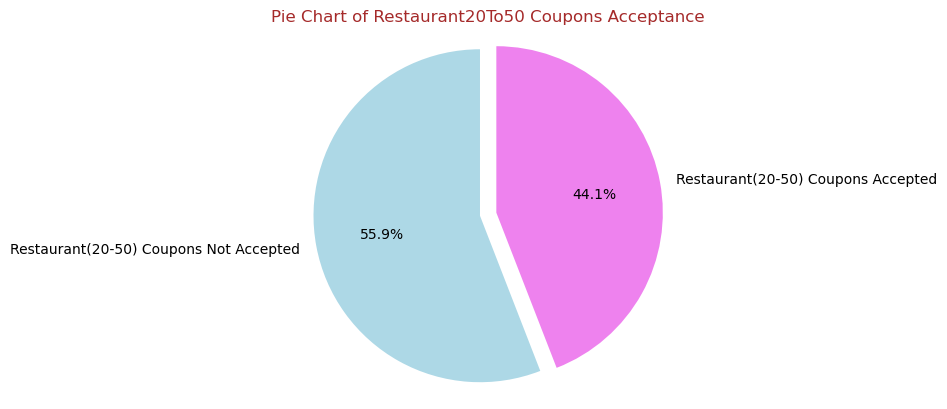

In [2230]:
#  Exploring Restaurant(20-50) coupon type.

#  Create DataFrame that only contains Restaurant(20-50) coupons
Restaurant20To50_Data = data[data['coupon']=='Restaurant(20-50)']

#  Calculate the Restaurant(20-50) coupons accepted proportion
Restaurant20To50CouponAccepatedProportion = (Restaurant20To50_Data['Y'] == 1).mean()
print('The proportion of Restaurant20To50 coupons accepted is: ' + str(Restaurant20To50CouponAccepatedProportion))

#  Plot a pie chart to visualize coupon accepted vs not accepted audience
Restaurant20To50DataCounts = Restaurant20To50_Data['Y'].value_counts()
Restaurant20To50DataCountsLabels = ['Restaurant(20-50) Coupons Not Accepted','Restaurant(20-50) Coupons Accepted']
Restaurant20To50DataCountsColors = ['lightblue','violet']
plt.pie(Restaurant20To50DataCounts, labels = Restaurant20To50DataCountsLabels, colors = Restaurant20To50DataCountsColors, autopct = '%1.1f%%', startangle = 90,explode=[0,0.1])
plt.title('Pie Chart of Restaurant20To50 Coupons Acceptance',color='Brown')
plt.axis('equal')
plt.show()


Text(0.5, 1.0, 'Pie Chart of Restaurant20To50 Coupons based on Income')

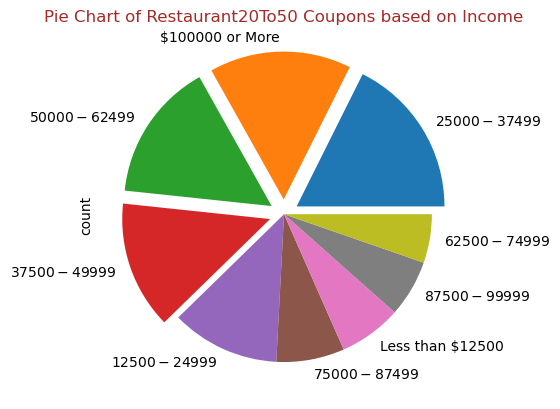

In [2231]:
#  Income distribution for the drivers who accepted Restaurant(20-50) coupon
Restaurant20To50_Accepted_Data = Restaurant20To50_Data[Restaurant20To50_Data['Y']==1]
Restaurant20To50_Income = Restaurant20To50_Accepted_Data['income'].value_counts()
Restaurant20To50_Income.plot(kind='pie',explode = [.1,.1,.1,.1,0,0,0,0,0])
plt.title('Pie Chart of Restaurant20To50 Coupons based on Income',color='Brown')

Text(0.5, 1.0, 'Pie Chart representing Restaurant20To50 distribution for Coupon accepted audience')

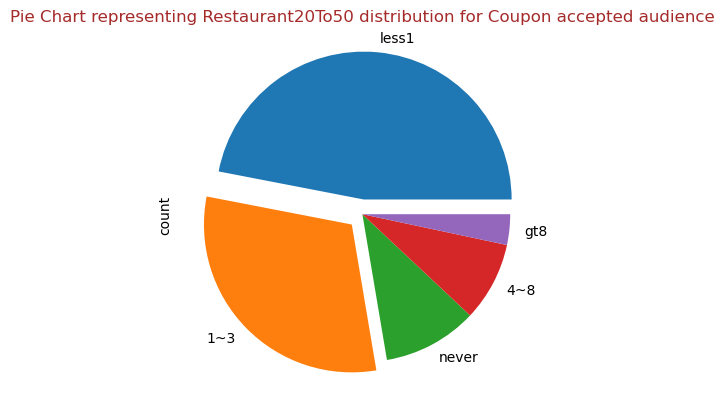

In [2232]:
#  Restaurant20To50 column distribution for the drivers who accepted Restaurant(20-50) coupon
Restaurant20To50__Coloumn = Restaurant20To50_Accepted_Data['Restaurant20To50'].value_counts()
Restaurant20To50__Coloumn.plot(kind='pie',explode = [0.1,0.1,0,0,0])
plt.title('Pie Chart representing Restaurant20To50 distribution for Coupon accepted audience',color='Brown')

Text(0.5, 1.0, 'Chart for Age and Gender Restaurant20To50 distribution for Coupon accepted audience')

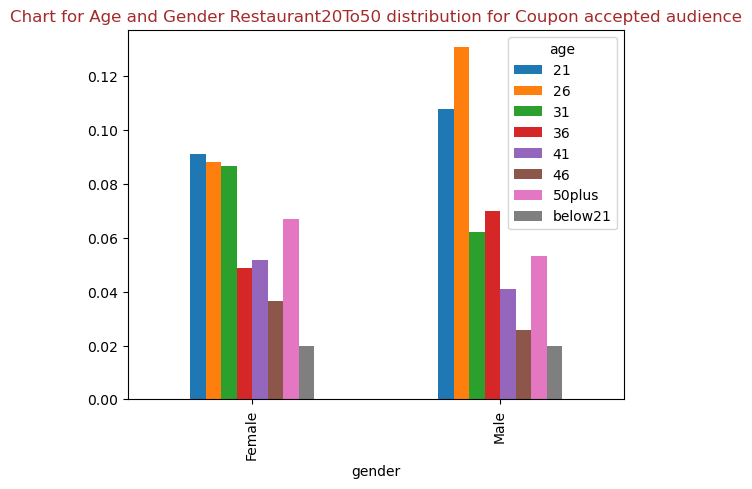

In [2233]:
# Age distribution for the drivers who accepted Restaurant(20-50) coupon
Restaurant20To50__Age = Restaurant20To50_Accepted_Data['age'].value_counts()
pd.crosstab(Restaurant20To50_Accepted_Data.gender,Restaurant20To50_Accepted_Data.age,normalize=True).plot(kind='bar')
plt.title('Chart for Age and Gender Restaurant20To50 distribution for Coupon accepted audience',color='Brown')

Text(0.5, 1.0, 'Pie Chart for Restaurant20To50 Coupon accepted audience driving direction')

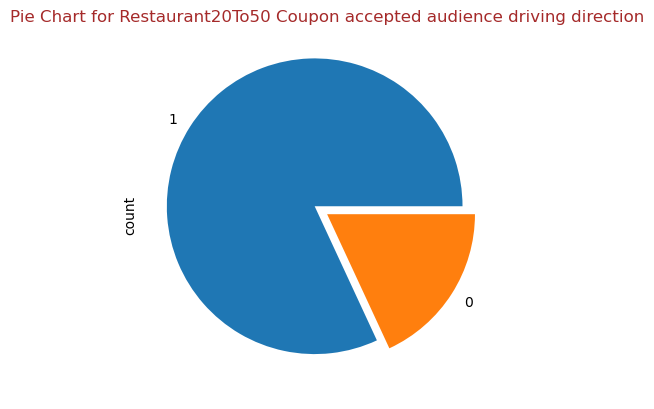

In [2234]:
# Direction_opp distribution for the drivers who accepted Restaurant(20-50) coupon
Restaurant20To50__Direction_Opp = Restaurant20To50_Accepted_Data['direction_opp'].value_counts()
Restaurant20To50__Direction_Opp.plot(kind='pie', explode = [0.1,0])
plt.title('Pie Chart for Restaurant20To50 Coupon accepted audience driving direction',color='Brown')

Text(0.5, 0, 'Count')

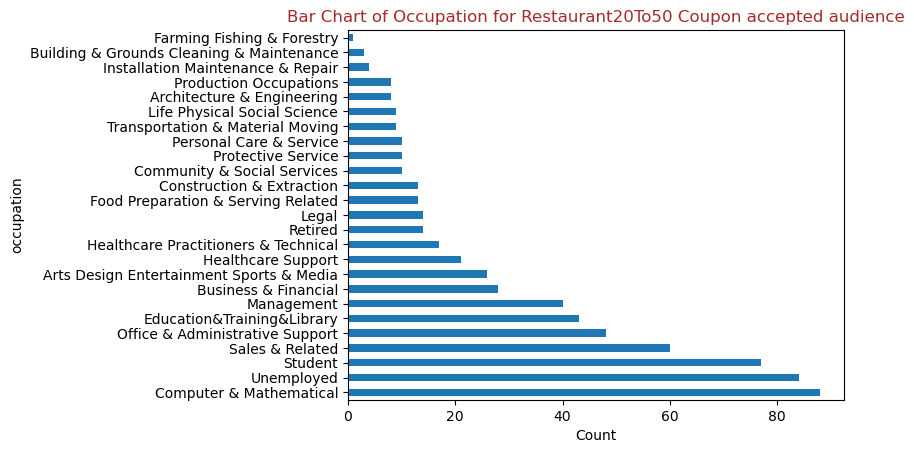

In [2235]:
# Occupation distribution for the drivers who accepted Restaurant(20-50) coupon
Restaurant20To50__Occupation = Restaurant20To50_Accepted_Data['occupation'].value_counts()
Restaurant20To50__Occupation.plot(kind='barh')
plt.title('Bar Chart of Occupation for Restaurant20To50 Coupon accepted audience',color='Brown')
plt.xlabel('Count')

### Based on the observations made above we can hypothesize following about the drivers who accepted the Restaurant20To50 coupon.
##### Drivers who accepted have following characteristics.
 - The top 4 values of income range reported were - \\$100000 or More, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$37500 - \\$49999 
 - The highest proportion of 'Restaurant20To50' column was captured by less1 and 1~3 values
 - Among the drivers who accepted following age groups were part of the higher proportion in the overall age distribution  -  31,21 and 26, where as gender of the drivers is not affecting coupon acceptance rate significantly.
 - Among the drivers who accepted 81% were opposite direction
 - The top 7 occupations were - Computer & Mathematical, Unemployed, Student, Sales & Related, Office & Administrative Support, Education&Training&Library, and Management 